In [1]:
import cv2
import numpy as np
from scipy import misc
I = misc.ascent()

In [2]:
I.shape

(512, 512)

In [3]:
K = I[101:131, 120:130]
K

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

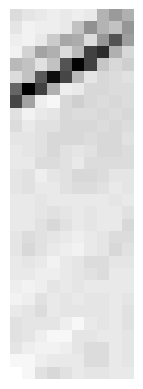

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.axis('off')
plt.imshow(K)
plt.show()

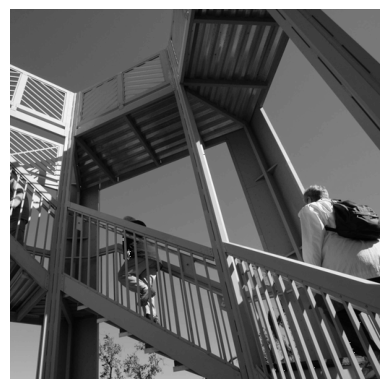

In [5]:
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

In [6]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [7]:
filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
# filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

weight = 1

In [8]:
np.array(filter).shape

(3, 3)

In [9]:
np.array(filter).T

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

#### Convolution

In [10]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (I[x-1, y-1] * filter[0][0])
        convolution = convolution + (I[x, y-1] * filter[0][1])
        convolution = convolution + (I[x+1, y-1] * filter[0][2])
        convolution = convolution + (I[x-1, y] * filter[1][0])
        convolution = convolution + (I[x-1, y+1] * filter[2][0])
        convolution = convolution + (I[x, y] * filter[1][1])
        convolution = convolution + (I[x+1, y] * filter[1][2])
        convolution = convolution + (I[x+1, y+1] * filter[2][2])
        convolution = convolution + (I[x, y+1] * filter[2][1])
        convolution *= weight

        if convolution < 0:
            convolution = -convolution

        if convolution > 255:
            convolution = 255

        I_transformed[x, y] = convolution

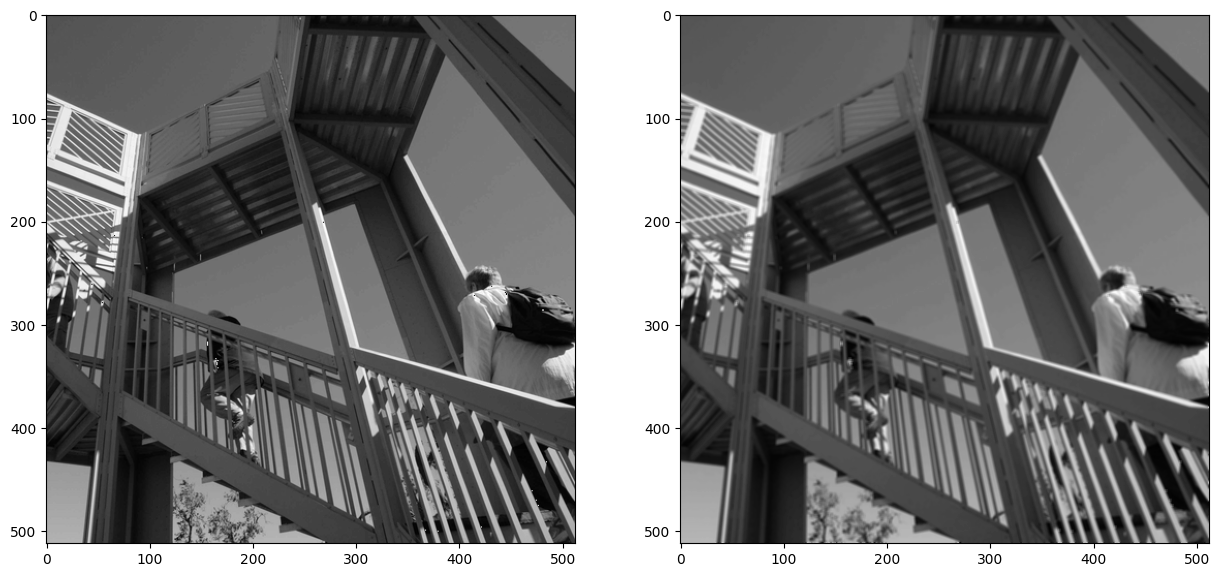

In [11]:
plt.figure(figsize=(15, 7))
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.subplot(1, 2, 2)
plt.imshow(I_transformed)
plt.show()

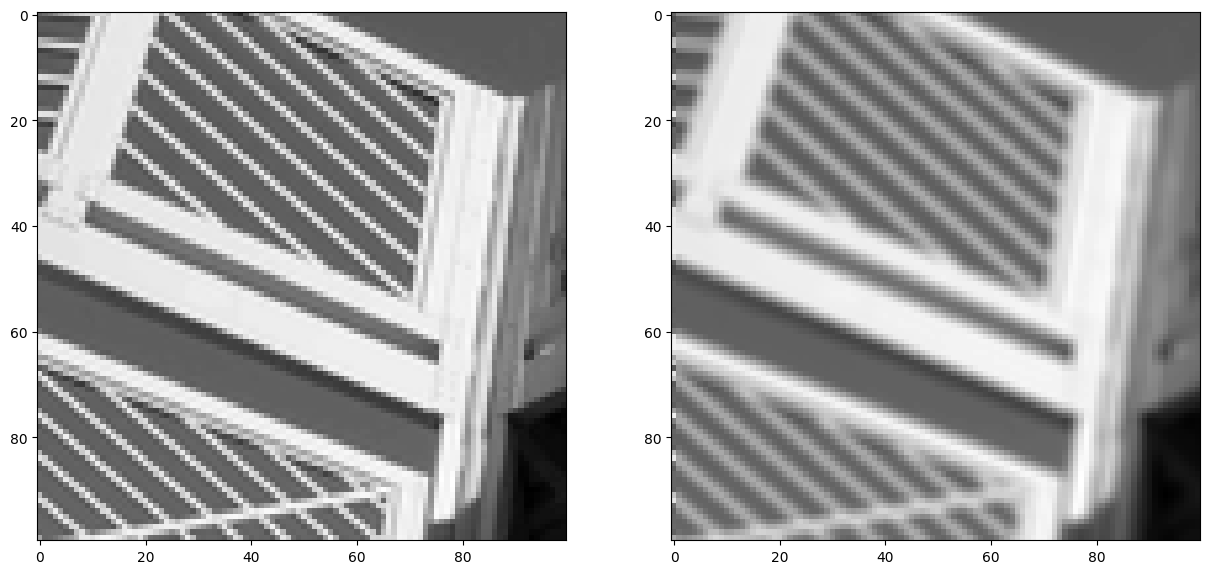

In [12]:
ymin, ymax, xmin, xmax = 100, 200, 0, 100

plt.figure(figsize=(15, 7))
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(I[ymin:ymax, xmin:xmax])
plt.subplot(1, 2, 2)
plt.imshow(I_transformed[ymin:ymax, xmin:xmax])
plt.show()

In [13]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, Input
from keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

from keras.utils import plot_model

In [14]:
data = [
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 0],
]

data = np.array(data)
data = data.reshape(1, 8, 8, 1)

In [15]:
x_input = Input(shape=(8,8,1))
x_conv = Conv2D(1, (3, 3), strides=(1, 1), activation='relu')(x_input)
x_pool = MaxPooling2D()(x_conv)

In [16]:
model = Model(x_input, x_pool)
model_conv = Model(x_input, x_conv)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


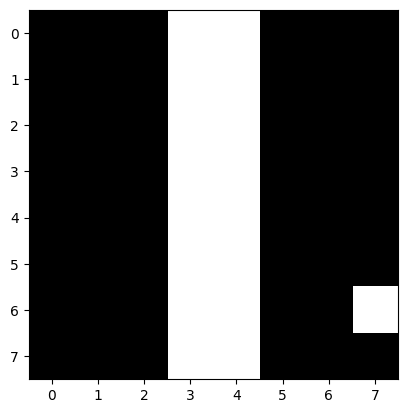

In [17]:
plt.imshow(data[0,:,:,0])
plt.show()

In [18]:
hh = model.layers[-2]
hh

In [19]:
w_old = model.layers[-2].get_weights()
w_old

[array([[[[-0.5731734 ]],
 
         [[ 0.2464233 ]],
 
         [[-0.5050032 ]]],
 
 
        [[[ 0.23242855]],
 
         [[-0.10434747]],
 
         [[ 0.5639875 ]]],
 
 
        [[[ 0.2515973 ]],
 
         [[ 0.0280121 ]],
 
         [[-0.300203  ]]]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
w_old[0].shape

(3, 3, 1, 1)

In [ ]:
detector = [
    [
        [[0]], [[1]], [[0]]
    ],
    [
        [[0]], [[1]], [[0]]
    ],
    [
        [[0]], [[1]], [[0]]
    ]
]

weights = [np.array(detector), np.array([0.0])]

model.set_weights(weights)

ypool = model.predict(data)

print(ypool[0].T)